In [64]:
# globals for google colab ot not and others
run_on_colab = True
copy_code_from_drive = True
convert_notebook_to_py = True
copy_code_to_drive = True

In [65]:
if run_on_colab:
  from google.colab import drive
  drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
if run_on_colab:
  !rm -rf /content/code/output/
  !mkdir -p /content/code/output/
  %cd /content/code/

  #!pwd

  path_to_hw3 = "/content/drive/MyDrive/studies/master/courses/spring_2020_2021/046746_computer_vision/hw_collab/hw3"
  hw3_code = path_to_hw3 + "/code"

  #ls_command = f"ls {hw3_code}"
  #!$ls_command

  if copy_code_from_drive:
    cp_command = f"cp -r {hw3_code}/* ./"
    !$cp_command

  if convert_notebook_to_py:
    !jupyter nbconvert --to python Q2.ipynb --output Q2.py
  
  if copy_code_to_drive:
    cp_command = f"cp ./Q2.py {hw3_code}/"
    !$cp_command
  
  #!ls ./data


/content/code
[NbConvertApp] Converting notebook Q2.ipynb to python
[NbConvertApp] Writing 7325 bytes to Q2.py


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from shared_Q1_Q2 import *
from frame_video_convert import *

converting video to frames...
total frames:  608


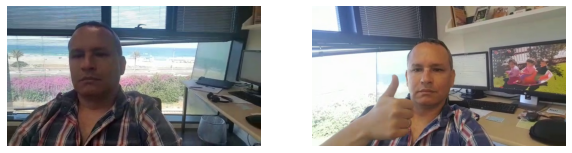

In [47]:
# %% Q2.1

# Convert .mp4 video to .jpg frames 

self_input_file_path = "./my_data/self.mp4"
self_output_dir_path = "./output/self_frames"

if os.path.exists(self_output_dir_path):
  files = glob.glob(self_output_dir_path + "/*")
  for f in files:
    os.remove(f)
  os.removedirs(self_output_dir_path)
if not os.path.exists(self_output_dir_path):
  os.makedirs(self_output_dir_path)

video_to_image_seq(self_input_file_path, self_output_dir_path)

# Showing 2 frames
self_frame1_name = "0350.jpg"
self_frame2_name = "0550.jpg"
self_frame1_file_path = self_output_dir_path + "/" + self_frame1_name
self_frame2_file_path = self_output_dir_path + "/" + self_frame2_name
self1 = cv2.cvtColor(cv2.imread(self_frame1_file_path), cv2.COLOR_BGR2RGB)
self2 = cv2.cvtColor(cv2.imread(self_frame2_file_path), cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10,15))
self_images = [self1, self2]
for i,file in enumerate(self_images):
  ax = fig.add_subplot(1, len(self_images),i+1)
  ax.imshow(self_images[i])
  ax.set_axis_off()


In [48]:
# %% Q2.2

# Prepearing the model
# load model
model=torch.hub.load('pytorch/vision:v0.5.0','deeplabv3_resnet101',pretrained=True)
# put in inference mode
model.eval()
# define device
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model=model.to(device)

# Deep segmentation
segmented_self_output_dir_path = "./output/segmented_self_frames"

if os.path.exists(segmented_self_output_dir_path):
  files = glob.glob(segmented_self_output_dir_path + "/*")
  for f in files:
    os.remove(f)
  os.removedirs(segmented_self_output_dir_path)
if not os.path.exists(segmented_self_output_dir_path):
  os.makedirs(segmented_self_output_dir_path)

input_files = sorted(glob.glob(os.path.join(self_output_dir_path, '*.jpg')))
for filename in input_files:
  img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
  path, fname = os.path.split(filename)
  seg_img = DeepLabSegmentation(img, model, device, 1)
  cv2.imwrite(os.path.join(segmented_self_output_dir_path, fname), seg_img)



Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.5.0


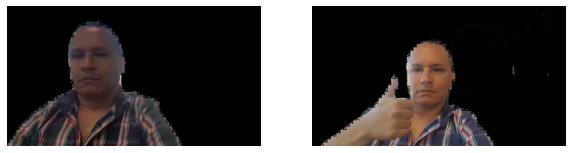

In [49]:
# Showing the 2 segmented frames

seg_self_frame1_file_path = segmented_self_output_dir_path + "/" + self_frame1_name
seg_self_frame2_file_path = segmented_self_output_dir_path + "/" + self_frame2_name
seg_self1 = cv2.cvtColor(cv2.imread(seg_self_frame1_file_path), cv2.COLOR_BGR2GRAY)
seg_self2 = cv2.cvtColor(cv2.imread(seg_self_frame2_file_path), cv2.COLOR_BGR2GRAY)


fig = plt.figure(figsize=(10,15))
seg_self_images = [seg_self1, seg_self2]
for i,file in enumerate(seg_self_images):
  ax = fig.add_subplot(1, len(seg_self_images),i+1)
  seg_values, value_counts = np.unique(seg_self_images[i].reshape(-1),axis=0, return_counts=True)
  value_count_sort_ind = np.argsort(value_counts)
  #print(seg_values[value_count_sort_ind])
  #print(value_counts[value_count_sort_ind])
  curClass = seg_values[value_count_sort_ind][-2]
  mask_self = np.zeros_like(seg_self_images[i])
  mask_self[seg_self_images[i] == curClass] = 1
  self_cropped = cropWithRespectToMask(self_images[i], mask_self)
  ax.imshow(self_cropped)
  ax.set_axis_off()

In [50]:
# %% Q2.3

# Convert .mp4 video to .jpg frames

dancing_man_input_file_path = "./data/dancing_man_model.mp4"
dancing_man_output_dir_path = "./output/dancing_man_frames"

if os.path.exists(dancing_man_output_dir_path):
  files = glob.glob(dancing_man_output_dir_path + "/*")
  for f in files:
    os.remove(f)
  os.removedirs(dancing_man_output_dir_path)
if not os.path.exists(dancing_man_output_dir_path):
  os.makedirs(dancing_man_output_dir_path)

video_to_image_seq(dancing_man_input_file_path, dancing_man_output_dir_path)

converting video to frames...
total frames:  201


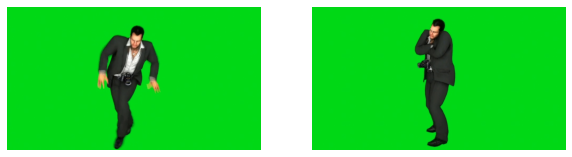

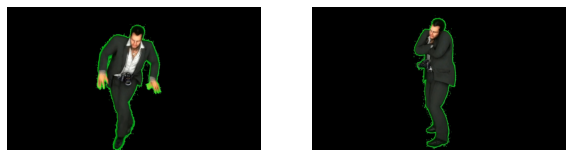

In [51]:
# semantic segmentation using color segmentation

seg_dancing_man_dir_path = "./output/segmented_dancing_man_frames"

if os.path.exists(seg_dancing_man_dir_path):
  files = glob.glob(seg_dancing_man_dir_path + "/*")
  for f in files:
    os.remove(f)
  os.removedirs(seg_dancing_man_dir_path)
if not os.path.exists(seg_dancing_man_dir_path):
  os.makedirs(seg_dancing_man_dir_path)

input_files = sorted(glob.glob(os.path.join(dancing_man_output_dir_path, '*.jpg')))
for filename in input_files:
  img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2HSV)
  path, fname = os.path.split(filename)
  bg_hsv_green_low = (63, 250, 200) 
  bg_hsv_green_high = (63, 255, 230) 
  mask = cv2.inRange(img, bg_hsv_green_low,bg_hsv_green_high)
  mask_inv = cv2.bitwise_not(mask)
  seg_img = np.zeros_like(img)
  seg_img = cv2.bitwise_and(img, img, mask=mask_inv)
  #if fname == "0000.jpg":
  #  plt.subplot(1, 2, 1)
  #  plt.imshow(mask, cmap="gray")
  #  plt.subplot(1, 2, 2)
  #  plt.imshow(cv2.cvtColor(seg_img, cv2.COLOR_HSV2RGB))
  #  plt.show()
  cv2.imwrite(os.path.join(seg_dancing_man_dir_path, fname), cv2.cvtColor(seg_img, cv2.COLOR_HSV2BGR))

dancing_man_frame1_name = "0100.jpg"
dancing_man_frame2_name = "0200.jpg"
dancing_man_frame1_file_path = dancing_man_output_dir_path + "/" + dancing_man_frame1_name
dancing_man_frame2_file_path = dancing_man_output_dir_path + "/" + dancing_man_frame2_name
dancing_man1 = cv2.cvtColor(cv2.imread(dancing_man_frame1_file_path), cv2.COLOR_BGR2RGB)
dancing_man2 = cv2.cvtColor(cv2.imread(dancing_man_frame2_file_path), cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10,15))
dancing_man_images = [dancing_man1, dancing_man2]
for i,file in enumerate(dancing_man_images):
  ax = fig.add_subplot(1, len(dancing_man_images),i+1)
  ax.imshow(dancing_man_images[i])
  ax.set_axis_off()

seg_dancing_man_frame1_file_path = seg_dancing_man_dir_path + "/" + dancing_man_frame1_name
seg_dancing_man_frame2_file_path = seg_dancing_man_dir_path + "/" + dancing_man_frame2_name
seg_dancing_man1 = cv2.cvtColor(cv2.imread(seg_dancing_man_frame1_file_path), cv2.COLOR_BGR2RGB)
seg_dancing_man2 = cv2.cvtColor(cv2.imread(seg_dancing_man_frame2_file_path), cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10,15))
seg_dancing_man_images = [seg_dancing_man1, seg_dancing_man2]
for i,file in enumerate(seg_dancing_man_images):
  ax = fig.add_subplot(1, len(seg_dancing_man_images),i+1)
  ax.imshow(seg_dancing_man_images[i])
  ax.set_axis_off()
